# Sweep Wave
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/tinyalg/waveu-ideas/blob/main/examples/sweep/docs/sweep.ipynb)
[![Run on ESP32](https://img.shields.io/badge/Run%20on-ESP32-orange?logo=espressif)](https://github.com/tinyalg/waveu-ideas/tree/main/examples/sweep)

A **sweep wave** is a waveform where the frequency gradually changes over time instead of remaining constant. This gradual shift in frequency is useful for analyzing system responses, testing circuits, and generating special sound effects.

![(a)Frequency at midpoint of the sweep (starting from 100Hz, approaching 1000Hz)](sweep_10s.png)

![(b)End of the sweep at 1000Hz](sweep_20s.png)




## Types of Sweep Waves
Sweep waves are generally classified into **Linear Sweep** and **Exponential Sweep**, each following a distinct mathematical model.

### 1. Linear Sweep
A **linear sweep** increases or decreases frequency at a constant rate over time. The instantaneous frequency $ f(t) $ at time $ t $ is given by:


$$
f(t) = f_{\text{start}} + \frac{(f_{\text{end}} - f_{\text{start}})}{T} \cdot t
$$

where:
- $ f_{\text{start}} $ is the initial frequency,
- $ f_{\text{end}} $ is the final frequency,
- $ T $ is the total sweep duration,
- $ t $ is the current time.

Below is the **linear sweep waveform** at midpoint of the sweep (starting from 100Hz, approaching 1000Hz):

- The **frequency increases linearly**, meaning the rate of change remains constant over time.
- The **phase is continuously integrated**, ensuring smooth waveform transitions.

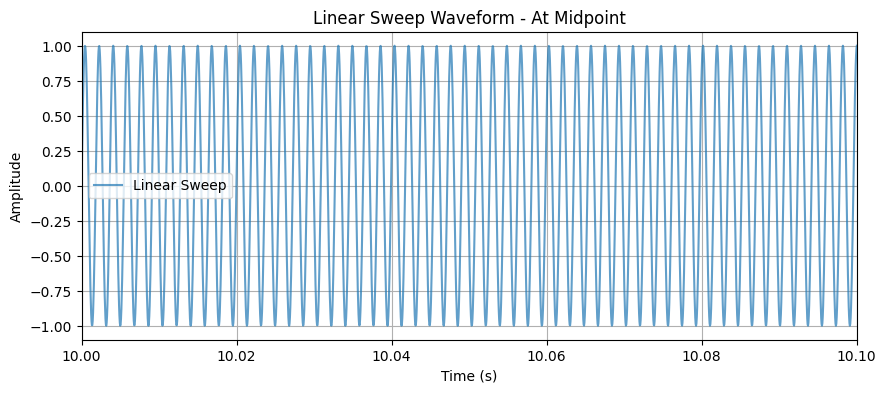

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters for the continuous linear sweep
f_start = 100   # Start frequency in Hz
f_end = 1000    # End frequency in Hz
T = 20.0         # Total sweep duration in seconds
sampling_rate = 20000  # Samples per second

# Time array
t = np.linspace(0, T, int(sampling_rate * T))

# Compute continuous frequency function (Linear)
f_t_linear = f_start + (f_end - f_start) * (t / T)

# Compute phase by integrating frequency over time
phi_t_linear = 2 * np.pi * np.cumsum(f_t_linear) / sampling_rate

# Generate continuous linear sweep waveform
x_t_linear_continuous = np.sin(phi_t_linear)

# Plot the first 0.2 seconds of the continuous linear sweep waveform
plt.figure(figsize=(10, 4))
plt.plot(t, x_t_linear_continuous, label="Linear Sweep", alpha=0.7)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Linear Sweep Waveform - At Midpoint")
plt.xlim(10,10.1)  # Show only at midpoint
plt.legend()
plt.grid()

# Show the plot
plt.show()
# REMOVE_THIS

### 2. Exponential Sweep
An **exponential sweep** changes the frequency exponentially, meaning the rate of frequency change is proportional to the frequency itself. The instantaneous frequency is given by:

$$
f(t) = f_{\text{start}} \cdot \left( \frac{f_{\text{end}}}{f_{\text{start}}} \right)^{\frac{t}{T}}
$$

where:
- $ f_{\text{start}} $ is the initial frequency,
- $ f_{\text{end}} $ is the final frequency,
- $ T $ is the total sweep duration,
- $ t $ is the current time.

Below is the **exponential sweep waveform** at midpoint of the sweep (starting from 100Hz, approaching 1000Hz):

- The **frequency increases exponentially**, producing a smoothly accelerating waveform.
- The **phase is continuously integrated**, ensuring a completely smooth transition.

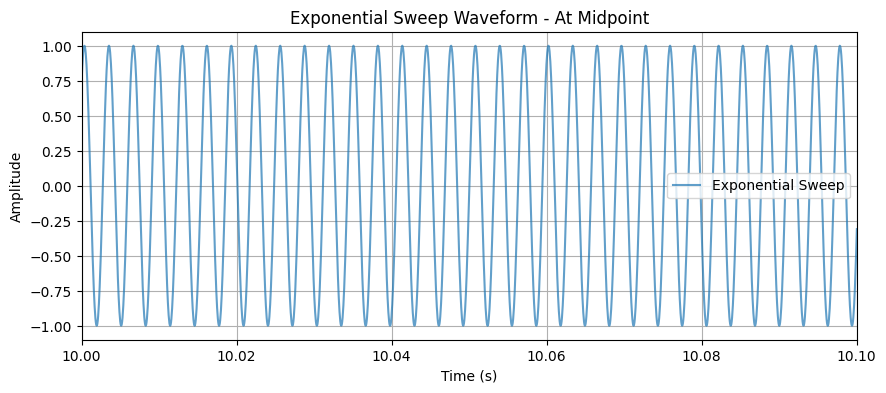

In [2]:
# Define parameters for the continuous exponential sweep
f_start = 100   # Start frequency in Hz
f_end = 1000    # End frequency in Hz
T = 20.0         # Total sweep duration in seconds
sampling_rate = 20000  # Samples per second

# Time array
t = np.linspace(0, T, int(sampling_rate * T))

# Compute continuous frequency function (Exponential)
f_t = f_start * (f_end / f_start) ** (t / T)

# Compute phase by integrating frequency over time
phi_t = 2 * np.pi * np.cumsum(f_t) / sampling_rate

# Generate continuous sweep waveform
x_t_continuous = np.sin(phi_t)

# Plot the first 0.2 seconds of the continuous exponential sweep waveform
plt.figure(figsize=(10, 4))
plt.plot(t, x_t_continuous, label="Exponential Sweep", alpha=0.7)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Exponential Sweep Waveform - At Midpoint")
plt.xlim(10, 10.1)  # Show only at midpoint
plt.legend()
plt.grid()

# Show the plot
plt.show()
# REMOVE_THIS

## Choosing Between Linear and Exponential Sweep
- **Linear Sweep**: Best for even frequency coverage, suitable for testing audio systems and electronic circuits.
- **Exponential Sweep**: More natural for hearing perception and used in acoustics and radar applications.
